In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('Social_Network_Ads.csv')

### Selected Features for Preprocessing

- **Numerical Features**: `Age`, `EstimatedSalary`
- **Categorical Features**: `Gender`

In [56]:
numerical_needed_columns = ['Age', 'EstimatedSalary']
categorical_needed_columns = ['Gender']

### 🧪 Train-Test Split

We selected the following columns as input features:

- **Numerical Features**: `Age`, `EstimatedSalary`
- **Categorical Features**: `Gender`

The target variable is:

- **Target**: `Purchased`

We then split the dataset into training and test sets us


In [ ]:
X = df[numerical_needed_columns + categorical_needed_columns]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=123)

### Preprocessing Pipeline using ColumnTransformer

This code defines a `ColumnTransformer` named `preprocessing` that applies different transformations to numerical and categorical columns:

- **Numerical columns:** Scaled using `StandardScaler`.
- **Categorical columns:** One-hot encoded with `OneHotEncoder` (dropping the first category to avoid multicollinearity).

In [59]:
preprocessing = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('scaler', StandardScaler())
    ]), numerical_needed_columns),
    
    ('cat', Pipeline([
        ('onehot', OneHotEncoder(drop='first')) 
    ]), categorical_needed_columns)
])

### Complete Modeling Pipeline

This pipeline combines preprocessing and model training into a single workflow:

- Applies the `preprocessing` transformations (scaling numerical features and one-hot encoding categorical features).
- Trains a `LogisticRegression` model on the transformed data.

In [60]:
model = Pipeline([
    ('preprocessing', preprocessing),
    ('LogisticRegression', LogisticRegression())
])

In [61]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender'])])),
                ('LogisticRegression', LogisticRegression())])

In [64]:
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.85


### Confusion Matrix Visualization

This code block:

- Computes the confusion matrix for the test labels (`y_test`) and predictions (`y_pred`).
- Prints the confusion matrix values.
- Uses `ConfusionMatrixDisplay` to plot a nicely formatted confusion matrix heatmap with a blue color map.
- Adds a title and shows the plot.

Confusion Matrix:
 [[57  6]
 [ 9 28]]


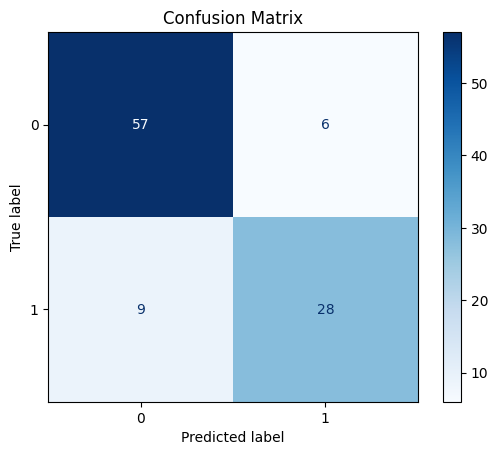

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.82      0.76      0.79        37

    accuracy                           0.85       100
   macro avg       0.84      0.83      0.84       100
weighted avg       0.85      0.85      0.85       100



In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob))

ROC AUC: 0.9356499356499356


In [69]:
data = {
    'Gender': ['Female'],
    'Age': [29],
    'EstimatedSalary': [54000],
}

example_df = pd.DataFrame(data)

y_example_prediction = model.predict(example_df)
y_example_prediction

array([0])

### Saving the Trained Model

This code saves the trained machine learning pipeline (`model`) to a file named `'LogisticRegressionModel.pkl'` using `joblib.dump`. This allows you to persist the model for later use without retraining.

In [79]:
import joblib

joblib.dump(model, 'LogisticRegressionModel.pkl')


['LogisticRegressionModel.pkl']